In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import wfdb
import csv
import os
from scipy.signal import butter, filtfilt
#from PyEMD import EMD
import time
import pywt
import biosppy.signals.ecg as bsp_ecg
import biosppy.signals.tools as bsp_tools

signal de longueur: 10000


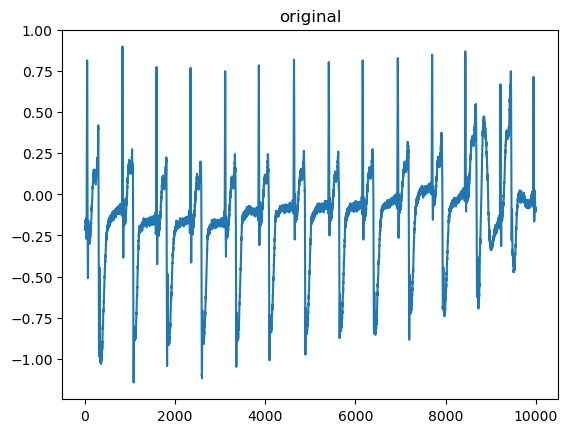

In [7]:
df = pd.read_csv('data_csv/mit_bih_Arrhythmia/207.csv') #207
mini = 0
maxi = 10000

ecg_signal = np.array(df["MLII"], dtype=np.float32)
sampling_rate = 360
QRS = df["labels"].dropna().tolist()
signal = ecg_signal[mini:maxi]
QRS = [int(R) for R in QRS if R <= maxi and R <= maxi]
print_signal(signal, "original")

In [ ]:
import numpy as np

def tqwt_parameters(Q, r):
  beta = (2 - Q) / Q
  alpha = beta / r
  return alpha, beta

def h0_filter(omega, alpha, beta):
    if abs(omega) >= alpha ** j * np.pi :
        temp = 1 
        for m in range(j-1):
            temp = temp * h0_filter((omega / ( alpha ** m)), alpha, beta)
        return temp
    return 0 

def h1_filter(omega, alpha, beta):
    if (1 - beta) * alpha ** (j-1) * np.pi <= abs(omega) <= alpha ** (j-1) * np.pi :
        temp = 1 
        for m in range(j-1):
            temp = temp * h0_filter((omega / ( alpha ** m)), alpha, beta)
        return temp
    return 0 

def tqwt_decomposition(signal, j, Q=1.5, r=3):
  alpha, beta = tqwt_parameters(Q, r)
  subbands = []
  return subbands

def gaussian_kernel(x, sigma):
  return (1 / np.sqrt(2 * np.pi * sigma**2)) * np.exp(-(x**2) / (2 * sigma**2))

def correntropy(signal, k, sigma=1):
  N = len(signal)
  correntropy_value = 0
  for n in range(k, N):
    correntropy_value += gaussian_kernel(signal[n] - signal[n - k], sigma)
  return correntropy_value / (N - k)


subbands = tqwt_decomposition(signal, j=3)
correntropy_values = [correntropy(band, k=10) for band in subbands]

In [4]:
def print_signal(signal, description):
    print(f"signal de longueur: {len(signal)}")
    plt.figure()
    plt.plot(signal)
    #plt.scatter(QRS, [signal[i] for i in QRS], color='red')
    plt.title(label= description)
    plt.show()
    
def print_signal_qrs(signal, description, qrs):
    print(f"signal de longueur: {len(signal)}")
    plt.figure()
    plt.plot(signal)
    plt.scatter(qrs, [signal[i] for i in qrs], color='red')
    plt.title(label= description)
    plt.show()
    
def perf(labels, peaks, minmax):
    x = np.concatenate([np.array(labels), np.array(peaks)]) #list(set(QRS + r_peaks))
    x.sort()
    diff = x[1:]-x[:-1]
    gps = np.concatenate([[0], np.cumsum(diff>=minmax)])
    temp = [x[gps==i] for i in range(gps[-1]+1)]
    TP = 0
    FP = 0
    FN = 0
    list_F = []
    for sublist in temp:
        if len(sublist) == 2:
            TP += 1
        else:
            list_F.append(sublist)
            if sublist[0] in labels:
                FN += 1
            else:
                FP += 1
    return TP, FP, FN #, list_F